In [1]:
# Homework 6 Template
# G. Besla & R. Li

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass

from tqdm import tqdm



In [19]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
          galaxy: 'str' name of the galaxy, e.g. 'MW'
          start:  'int' Number of the first snapshot to read in
          end:    'int' Number of the last snapshot to read in
          n:      'int' integer indicating the intervals over which to return the COM
    outputs: 
          file that stores the time of the snap number, the xyz position and vx, vy,vz velocities of the Center of Mass
          for every snap number specified.
    """
    
    # compose the filename for output
    fileout = f"Orbit_{galaxy}.txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = 0.1
    if galaxy == 'M33':
        volDec = 4.0
    else:
        volDec = 2.0

    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)  
    snap_ids = np.arange(start, end+1, n, dtype=int)
    if snap_ids.size == 0:
        print("Incorect start, end, or n values.")
        return
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([snap_ids.size, 7])
    
    # a for loop 
    for  i, snap_id in enumerate(tqdm(snap_ids)): # loop over files
        
        # compose the data filename (be careful about the folder)
        filename = f"VLowRes/{galaxy}/{galaxy}_{snap_id:03}.txt"
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename, 2)

        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COM_P = COM.COM_P(delta = delta, volDec = volDec)
        COM_V = COM.COM_V(*COM_P)
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        orbit[i] = COM.time.value/1000, *COM_P.value, *COM_V.value

        # print snap_id to see the progress
        # print(snap_id)

    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [20]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
OrbitCOM('MW', 0, 800, 5)

100%|████████████████████████████████████████████████████████████████████████████████| 161/161 [01:51<00:00,  1.45it/s]


In [21]:
# Generate the file for M31
OrbitCOM('M31', 0, 800, 5)

100%|████████████████████████████████████████████████████████████████████████████████| 161/161 [02:30<00:00,  1.07it/s]


In [22]:
# Generate the file for M33
OrbitCOM('M33', 0, 800, 5)

100%|████████████████████████████████████████████████████████████████████████████████| 161/161 [00:18<00:00,  8.70it/s]


In [23]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
orbit_MW = np.genfromtxt('Orbit_MW.txt', names=True)
orbit_M31 = np.genfromtxt('Orbit_M31.txt', names=True)
orbit_M33 = np.genfromtxt('Orbit_M33.txt', names=True)

In [24]:
orbit_MW_pos = np.column_stack((orbit_MW['x'], orbit_MW['y'], orbit_MW['z']))
orbit_MW_vel = np.column_stack((orbit_MW['vx'], orbit_MW['vy'], orbit_MW['vz']))

In [25]:
orbit_M31_pos = np.column_stack((orbit_M31['x'], orbit_M31['y'], orbit_M31['z']))
orbit_M31_vel = np.column_stack((orbit_M31['vx'], orbit_M31['vy'], orbit_M31['vz']))

In [26]:
orbit_M33_pos = np.column_stack((orbit_M33['x'], orbit_M33['y'], orbit_M33['z']))
orbit_M33_vel = np.column_stack((orbit_M33['vx'], orbit_M33['vy'], orbit_M33['vz']))

In [27]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit 

In [28]:
# Determine the magnitude of the relative position and velocities 
# of MW and M31
sep_MW_M31 = np.linalg.norm(orbit_MW_pos - orbit_M31_pos, axis=1)
vel_MW_M31 = np.linalg.norm(orbit_MW_vel - orbit_M31_vel, axis=1)

# of M33 and M31
sep_M31_M33 = np.linalg.norm(orbit_M31_pos - orbit_M33_pos, axis=1)
vel_M31_M33 = np.linalg.norm(orbit_M31_vel - orbit_M33_vel, axis=1)

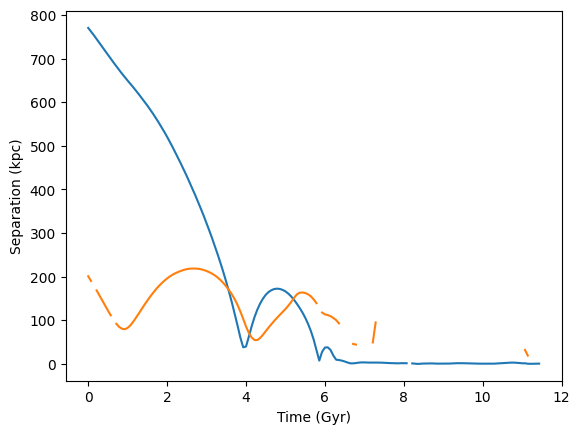

In [29]:
# Plot the Orbit of the galaxies 
#################################
fig, ax = plt.subplots()
ax.plot(orbit_MW['t'], sep_MW_M31)
ax.plot(orbit_M31['t'], sep_M31_M33)
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Separation (kpc)')
plt.show()


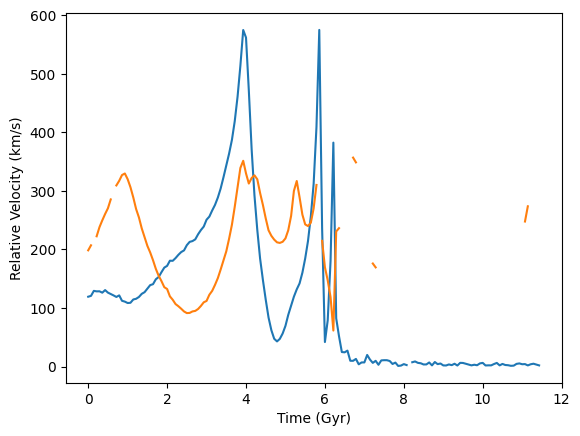

In [30]:
# Plot the orbital velocities of the galaxies 
#################################
fig, ax = plt.subplots()
ax.plot(orbit_MW['t'], vel_MW_M31)
ax.plot(orbit_M31['t'], vel_M31_M33)
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Relative Velocity (km/s)')
plt.show()